# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv('train.csv', sep = ',', engine = 'python')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
df = df.drop('dropoff_datetime', axis = 1)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [6]:
list_for_hist = range(0,10100,100)

Text(-17.305555555555557, 0.5, 'Частота')

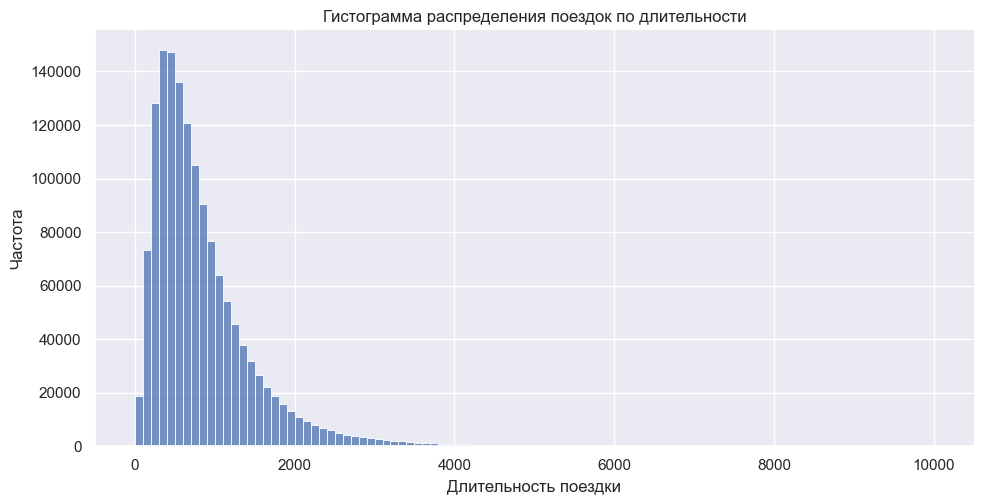

In [7]:
sns.displot(x=df['trip_duration'], bins=list_for_hist, aspect=2, height=5, kde=False)
plt.title('Гистограмма распределения поездок по длительности')
plt.xlabel('Длительность поездки')
plt.ylabel('Частота') 

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Целевая переменная имеет около нормальное распределение с маленьким хвостом слева и с большим хвостом справа, что говорит нам о том, что большинство поездок длится около значения 1000 и далее распределение частотности длительности поездки начинает падать, причем коротких поездок(меньше 1000) не так уж и много

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Стандартная метрика RMSE имеет большую чувствительность к выбросам, а логарифм уменьшает численные значения, тем самым снижая чувствительность к экстремальным значениям

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [8]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df = df.drop('trip_duration', axis=1)

Text(-8.805555555555555, 0.5, 'Частота')

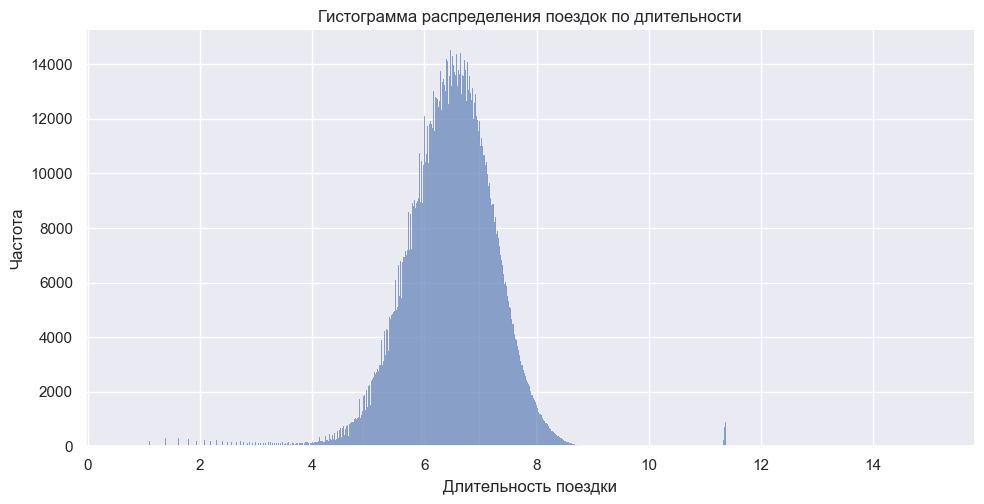

In [9]:
sns.displot(x=df['log_trip_duration'], aspect=2, height=5, kde=False)
plt.title('Гистограмма распределения поездок по длительности')
plt.xlabel('Длительность поездки')
plt.ylabel('Частота') 

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [10]:
def rmsle(log1p_y_true, log1p_y_pred): 
    sqr_error = (log1p_y_true - log1p_y_pred)**2
    avg = sqr_error.mean()
    rmsle = avg**(1/2)
    return rmsle
    raise NotImplementedError

log1p_y_true = df['log_trip_duration']
log1p_y_pred = df['log_trip_duration'].mean()


print(rmsle(log1p_y_true, log1p_y_pred))
#assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [11]:
df['days'] = df['pickup_datetime'].apply(lambda x : x.day_of_year)

Text(188.75, 0.5, 'Количество')

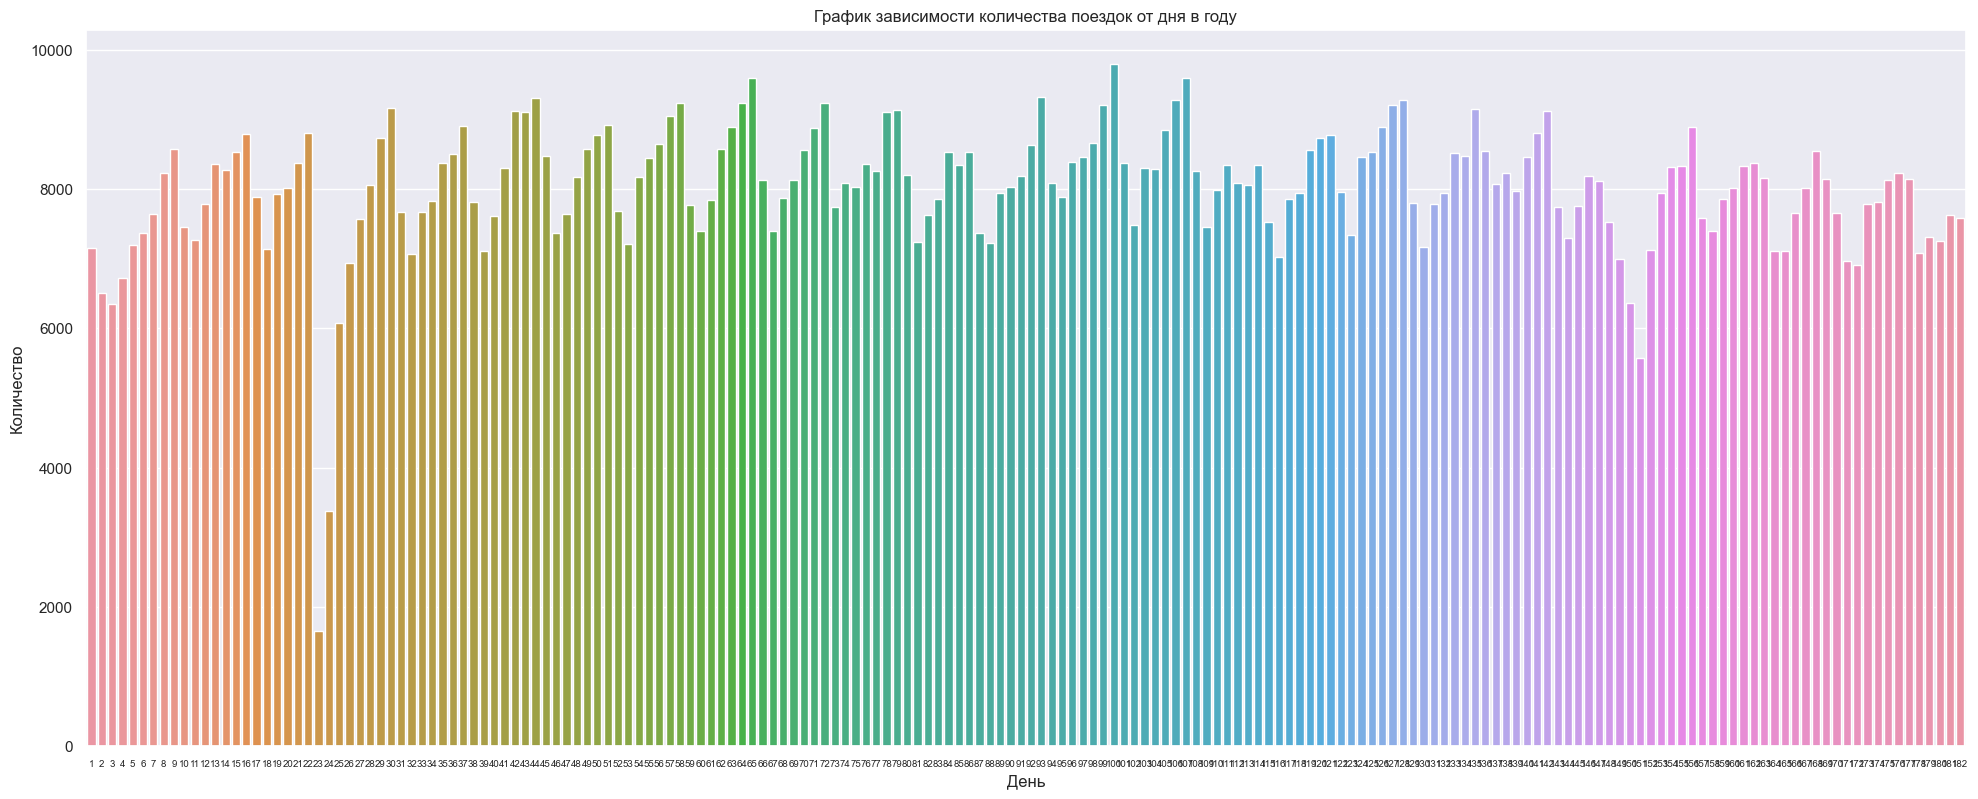

In [12]:
plt.figure(figsize=(20, 8))
sns.countplot(data= df, x = 'days')
plt.tight_layout()
plt.tick_params(axis = 'x', labelsize = 7)
plt.title('График зависимости количества поездок от дня в году')
plt.xlabel('День')
plt.ylabel('Количество') 

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [13]:
df['another_format_of_days'] = df['pickup_datetime'].dt.date
df.groupby('another_format_of_days')['id'].count().sort_values()

another_format_of_days
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6084
2016-01-03    6353
              ... 
2016-02-13    9309
2016-04-02    9325
2016-03-05    9597
2016-04-16    9602
2016-04-09    9796
Name: id, Length: 182, dtype: int64

Как мы видим, меньше всего поездок было 23-24 января и 30 мая.
В январе был сильный снегопад, из-за которого власти ограничили движение в городе: 
[Ссылка](https://en.wikipedia.org/wiki/January_2016_United_States_blizzard).

А 30 мая происходил день национальной памяти: 
[Ссылка](https://brightonbeachnews.com/rus/2016/05/30/).


Text(-8.805555555555555, 0.5, 'Количество поездок')

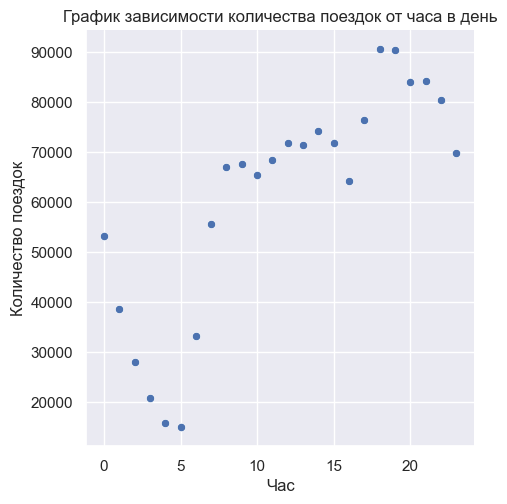

In [14]:
df['hours'] = df['pickup_datetime'].apply(lambda x : x.hour)
grouped_hours = pd.DataFrame(df.groupby('hours')['id'].count())
sns.relplot(x='hours', y='id', data=grouped_hours)
plt.title('График зависимости количества поездок от часа в день')
plt.xlabel('Час')
plt.ylabel('Количество поездок') 

Text(-17.305555555555557, 0.5, 'Количество поездок')

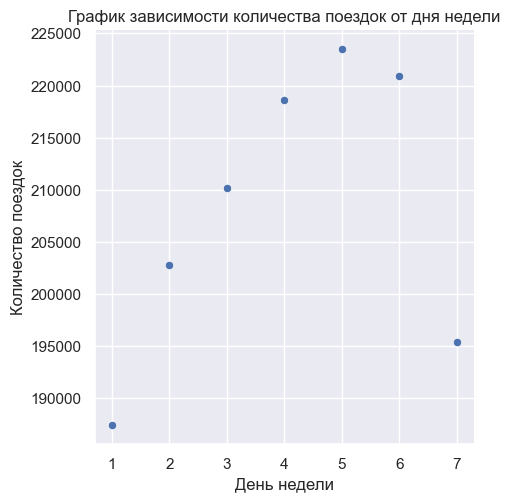

In [15]:
df['weeks'] = df['pickup_datetime'].apply(lambda x : x.weekday()+1)
grouped_weeks_day = pd.DataFrame(df.groupby('weeks')['id'].count())
sns.relplot(x='weeks', y='id', data=grouped_weeks_day)
plt.title('График зависимости количества поездок от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок') 

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

Text(54.91312500000002, 0.5, 'Количество поездок')

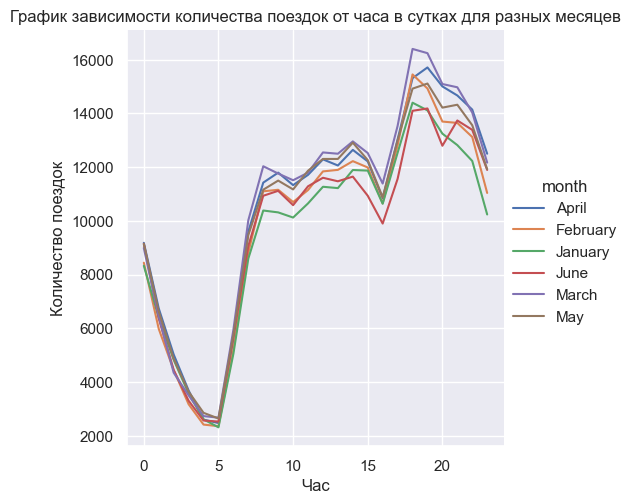

In [16]:
df['month'] = df['pickup_datetime'].dt.month_name()
grouped_monhs_hours = df.groupby(['month', 'hours'], as_index=False)['id'].count()
sns.relplot(x='hours', y='id', hue='month', data=grouped_monhs_hours, kind='line')
plt.title('График зависимости количества поездок от часа в сутках для разных месяцев')
plt.xlabel('Час')
plt.ylabel('Количество поездок') 

Text(44.96975000000002, 0.5, 'Количество поездок')

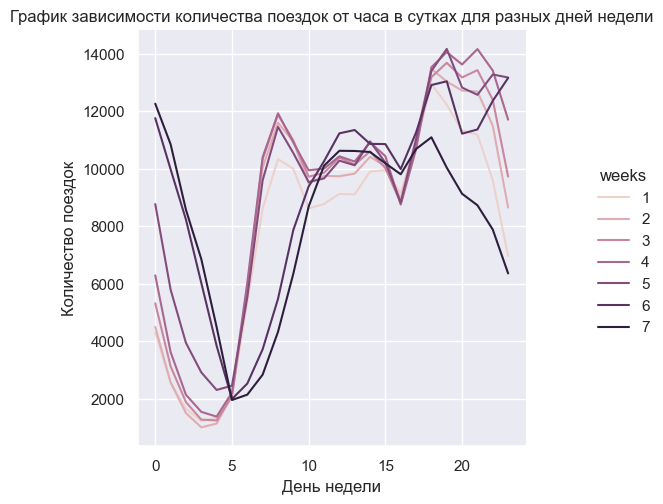

In [17]:
grouped_weeks_hours = df.groupby(['weeks', 'hours'], as_index=False)['id'].count()
sns.relplot(x='hours', y='id', hue='weeks', data=grouped_weeks_hours, kind='line')
plt.title('График зависимости количества поездок от часа в сутках для разных дней недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок') 

На графиках видны типичные маятниковые миграции населения. В будние дни количество заказов в начале дня выше, чем в выходные, зато ночью больше заказов в пятницу и субботу, что говорит о том, что в эти дни люди тусят и возвращаются домой.
Количество поездок от месяца особо не зависит, просто в каких-то месяцах их больше, а в каких-то меньше.

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [18]:
from sklearn.model_selection import train_test_split
Y = df['log_trip_duration'] #таргет переменна
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('log_trip_duration', axis = 1), 
                                                    Y, train_size = 0.7, test_size = 0.3, shuffle=True, random_state=10)

Text(0, 0.5, 'Средний логарифм длительности поездки')

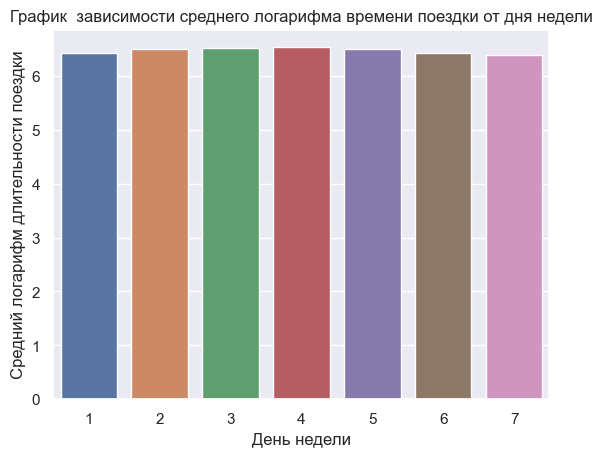

In [19]:
df_train = pd.concat([X_train, Y_train], axis=1) #соеденим таргет со всей отслаьной выборкой
avg_log_for_weeks =  pd.DataFrame(df_train.groupby(by = 'weeks')['log_trip_duration'].mean()).reset_index(drop=False) #посчитаем средний логарифм по дню недели
sns.barplot(x = avg_log_for_weeks['weeks'], y = avg_log_for_weeks['log_trip_duration'])
plt.title('График  зависимости среднего логарифма времени поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм длительности поездки') 

Text(0, 0.5, 'Средний логарифм длительности поездки')

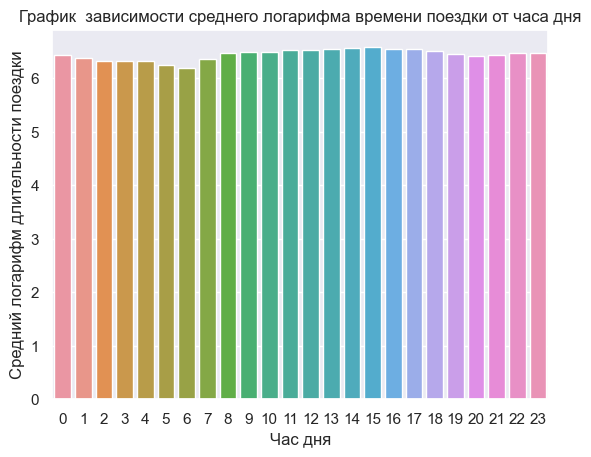

In [20]:
avg_log_for_hours =  pd.DataFrame(df_train.groupby(by = 'hours')['log_trip_duration'].mean()).reset_index(drop=False) #посчитаем средний логарифм по дню недели
sns.barplot(x = avg_log_for_hours['hours'], y = avg_log_for_hours['log_trip_duration'])
plt.title('График  зависимости среднего логарифма времени поездки от часа дня')
plt.xlabel('Час дня')
plt.ylabel('Средний логарифм длительности поездки') 

Text(0, 0.5, 'Средний логарифм длительности поездки')

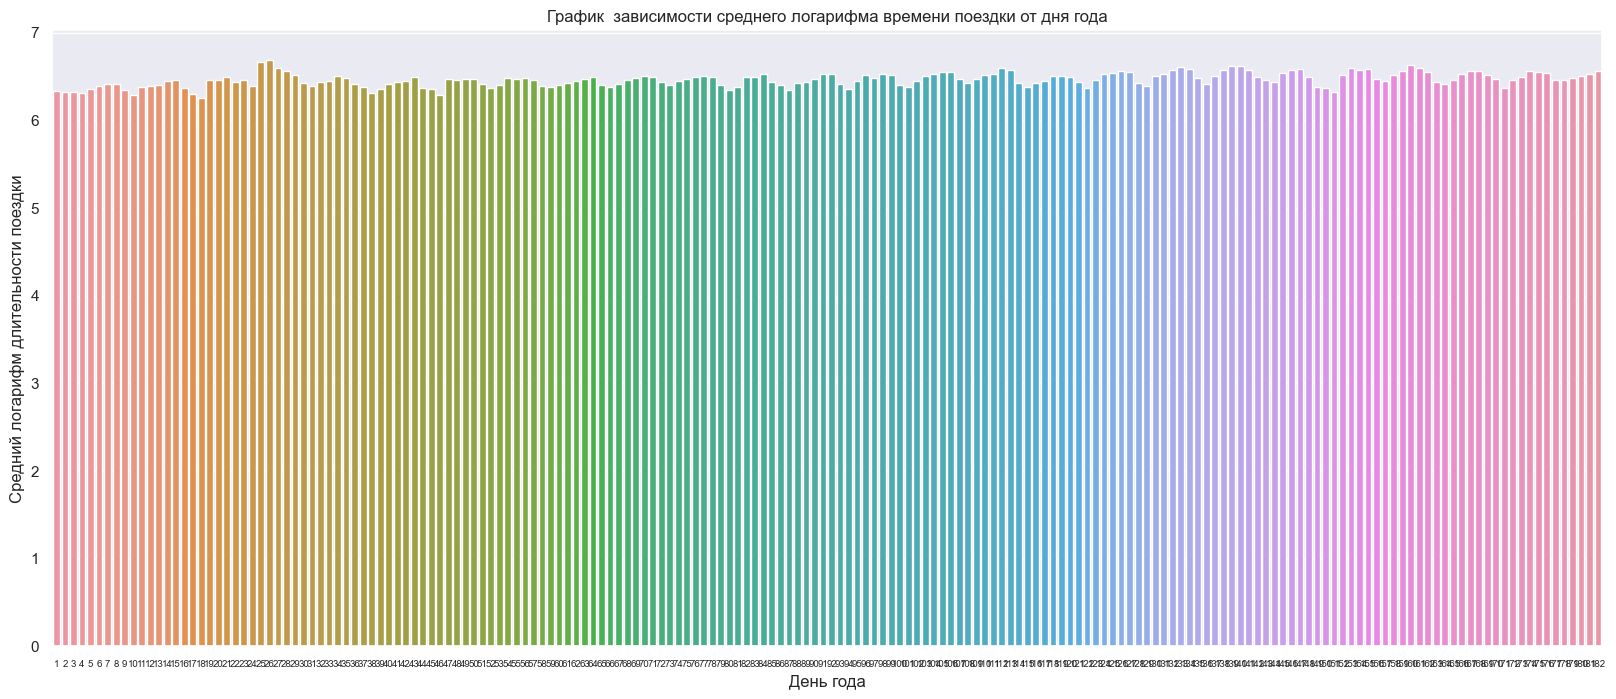

In [21]:
avg_log_for_days =  pd.DataFrame(df_train.groupby(by = 'days')['log_trip_duration'].mean()).reset_index(drop=False) #посчитаем средний логарифм по дню недели
plt.figure(figsize=(20, 8))
plt.tight_layout()
plt.tick_params(axis = 'x', labelsize = 7)
sns.barplot(x = avg_log_for_days['days'], y = avg_log_for_days['log_trip_duration'])
plt.title('График  зависимости среднего логарифма времени поездки от дня года')
plt.xlabel('День года')
plt.ylabel('Средний логарифм длительности поездки') 

Barplot был использован вместо countplot т.к. нельзя в countplot использовать X и Y: [Ссылка](https://stackoverflow.com/questions/47547235/seaborn-countplot-does-not-accept-both-x-and-y-arguments-in-python).


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Как раз благодаря логарифмированию значения практически уровнялись между собой т.е. выбросов теперь не видно, теперь трудно увидеть какие-то различия между данными. Тем не менее можно увидеть теже самые спады в утренние часы и уменьшением времени поездок в выходные дни. Скорее всего это связано с тем, что чем меньше заказов на такси, тем в целом меньше машин на дорогах, соответсвенно меньше пробок и средняя скорость поездки уменьшается. На графике зависимости log_trip_duration от номера дня в году видна сезонность, можно увидеть каждую неделю.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [22]:
df_train['day_of_week'] =  df_train['pickup_datetime'].dt.weekday
df_train['month'] =  df_train['pickup_datetime'].dt.month
df_train['hour'] =  df_train['pickup_datetime'].dt.hour
df_train['anomaly'] = df_train['days'].apply(lambda x: 1 if x == 23 or x == 24 or x == 150 else 0)
df_train['days']

824746      87
645821      78
691846     106
1147931     84
183569     119
          ... 
1348317    133
1154171     16
617841      81
1048548    100
1393929    118
Name: days, Length: 1021050, dtype: int64

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly']], df_train['log_trip_duration'],
                                                   train_size = 0.7, test_size = 0.3, shuffle=True)
numeric_features = ['days']
categorical = ['hours', 'weeks', 'month', 'anomaly']

column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                        ('scaling', StandardScaler(), numeric_features)])

pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', Ridge())])

model = pipeline.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test, Y_pred, squared=False))

Test MSE = 0.7880


Часть кода взята отсюда [Ссылка](https://github.com/esokolov/ml-course-hse/blob/master/2023-fall/seminars/sem02-sklearn-linregr.ipynb)

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [25]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [26]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [27]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Выделяются на карте 2 аэропорта, оттуда часто заказывают такси

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [28]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df_train.loc[:, 'distance_haversine'] = haversine_array(df_train['pickup_latitude'].values, df_train['pickup_longitude'].values, 
                                                        df_train['dropoff_latitude'], df_train['dropoff_longitude'])

Код взят отсюда: [Ссылка](https://github.com/esokolov/ml-course-hse/blob/master/2023-fall/seminars/sem01-pandas.ipynb)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [29]:
df_train['log_haversine'] = np.log1p(df_train['distance_haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [30]:
your_df = df_train
assert df_train['log_haversine'].corr(df_train['log_trip_duration']) > df_train['distance_haversine'].corr(df_train['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [31]:
df_train['avg_speed'] = df_train['distance_haversine']/np.exp(df_train['log_trip_duration']).mean()
df_train['avg_speed'] = df_train['avg_speed']*3600

Text(-8.805555555555555, 0.5, 'Количество поездок')

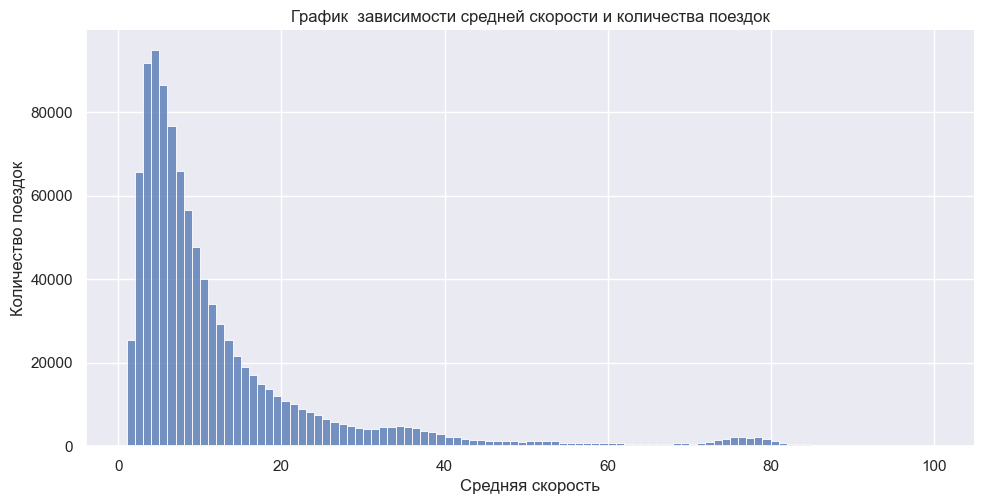

In [32]:
list_for_hist = range(1,101)
sns.displot(x=df_train['avg_speed'], bins=list_for_hist, aspect=2, height=5, kde=False)
plt.title('График  зависимости средней скорости и количества поездок')
plt.xlabel('Средняя скорость')
plt.ylabel('Количество поездок') 

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

Text(-8.805555555555555, 0.5, 'Количество поездок')

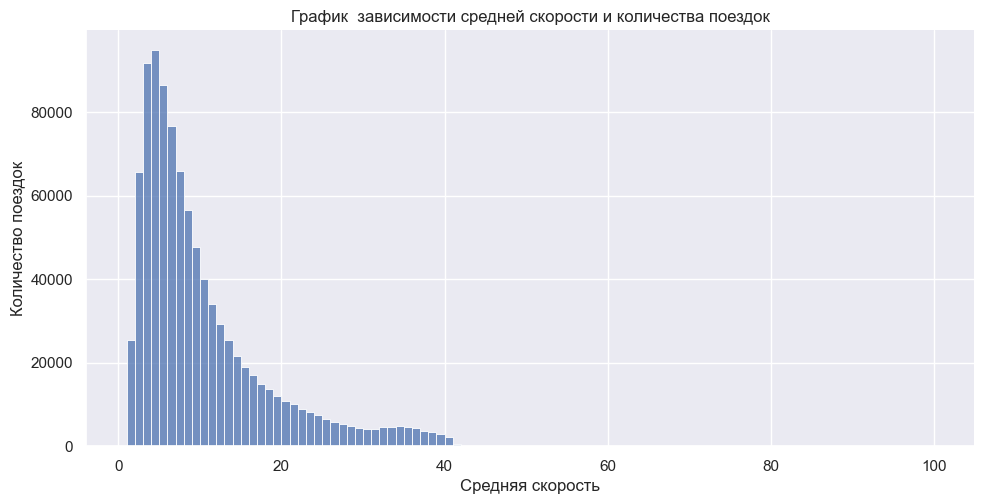

In [33]:
df_train['avg_speed_0.95'] = df_train['avg_speed'][df_train['avg_speed'] < np.quantile(df_train['avg_speed'], 0.95)]
sns.displot(x=df_train['avg_speed_0.95'], bins=list_for_hist, aspect=2, height=5, kde=False)
plt.title('График  зависимости средней скорости и количества поездок')
plt.xlabel('Средняя скорость')
plt.ylabel('Количество поездок') 

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [34]:
medium_speed_day_of_week = df_train.groupby('day_of_week',as_index=False)['avg_speed_0.95'].median()
medium_speed_hour = df_train.groupby('hour',as_index=False)['avg_speed_0.95'].median()
print(f'Медиана скорости по дню недели: {medium_speed_day_of_week}')
print(f'Медиана скорости по часам: {medium_speed_hour}')

Медиана скорости по дню недели:    day_of_week  avg_speed_0.95
0            0        7.284158
1            1        7.182929
2            2        7.239202
3            3        7.330484
4            4        7.338872
5            5        7.689075
6            6        7.988121
Медиана скорости по часам:     hour  avg_speed_0.95
0      0        9.302621
1      1        9.415247
2      2        9.396386
3      3        9.904377
4      4       10.386680
5      5        8.939492
6      6        7.811365
7      7        7.443406
8      8        6.829562
9      9        6.687202
10    10        6.759976
11    11        6.756080
12    12        6.693179
13    13        6.713980
14    14        6.779124
15    15        6.804486
16    16        6.829448
17    17        7.038365
18    18        7.028655
19    19        7.162289
20    20        7.761797
21    21        8.316659
22    22        8.669297
23    23        9.112467


C:\Users\Spacelight\AppData\Local\Temp\ipykernel_8620\3677646801.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(medium_speed_hour_of_week.pivot('day_of_week', 'hour', 'avg_speed_0.95'))


<Axes: title={'center': 'Корреляция между днями и часами по скорости'}, xlabel='hour', ylabel='day_of_week'>

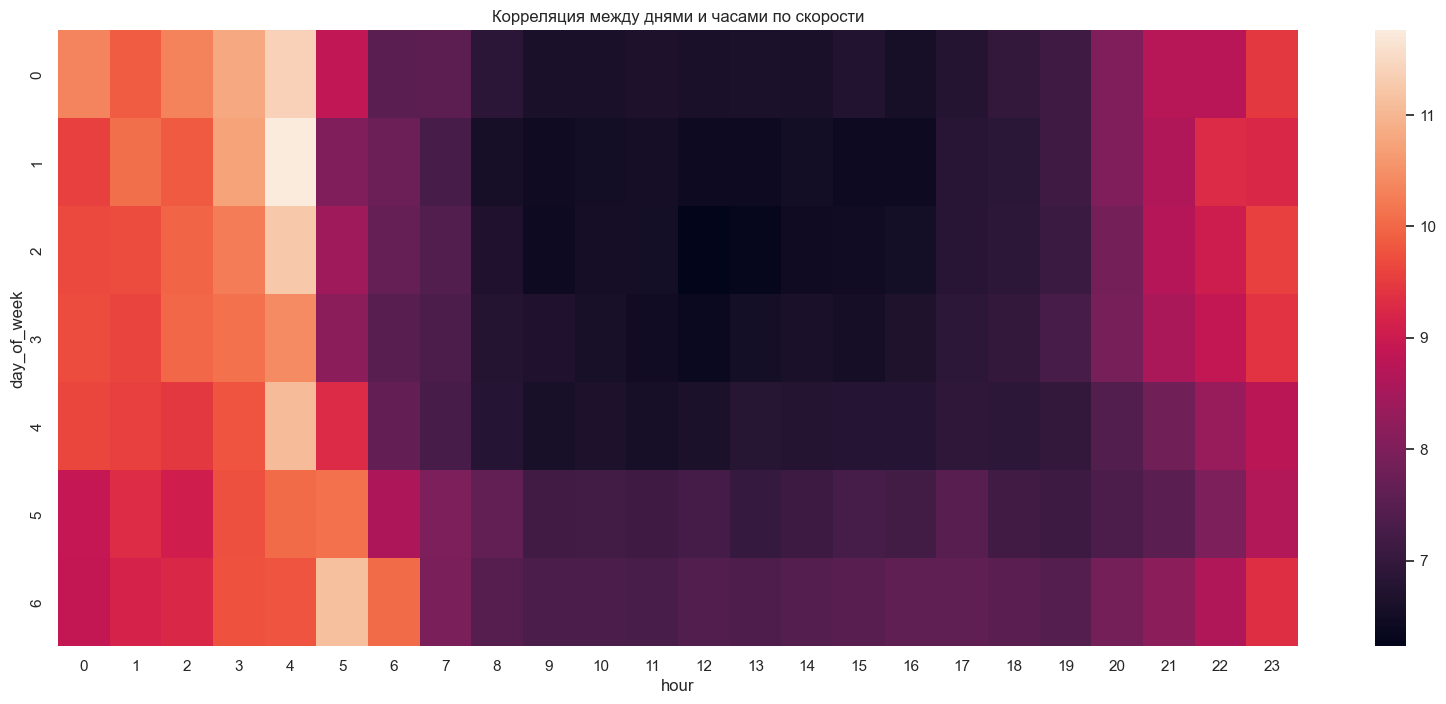

In [35]:
medium_speed_hour_of_week = df_train.groupby(['day_of_week', 'hour'], as_index=False)['avg_speed_0.95'].median()
plt.figure(figsize=(20, 8))
plt.title('Корреляция между днями и часами по скорости')
plt.xlabel('Часы')
plt.ylabel('День недели')
sns.heatmap(medium_speed_hour_of_week.pivot('day_of_week', 'hour', 'avg_speed_0.95'))

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Потому что скорость мы получили из таргета

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Минимальная скорость в будние дни с 7 утра до 19 часов

In [36]:
conditions = [
    (((df_train['hour'] >= 7) & (df_train['hour'] <= 19)) &
            (df_train['day_of_week'] < 5))]
     
numbers = [1]

df_train['traffic_jam_period'] = np.select(conditions, numbers, default=0)

conditions = [((((df_train['hour'] < 7) | (df_train['hour'] > 19)) & (df_train['day_of_week'] < 5)) | (df_train['day_of_week'] >= 5))]
     
numbers = [1]

df_train['no_traffic_jam_period'] = np.select(conditions, numbers, default=0)



**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [37]:
kennedy_df = df_train.loc[((df_train['pickup_latitude'] >= 40.61) & (df_train['pickup_latitude'] <= 40.67)) 
                & ((df_train['pickup_longitude'] >= -73.81) & (df_train['pickup_longitude'] <= -73.75))]

liberty_df = df_train.loc[((df_train['pickup_latitude'] >= 40.65) & (df_train['pickup_latitude'] <= 40.72)) 
                & ((df_train['pickup_longitude'] >= -74.21) & (df_train['pickup_longitude'] <= -74.14))]

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

Text(0.5, 0, 'Признак час пик периода')

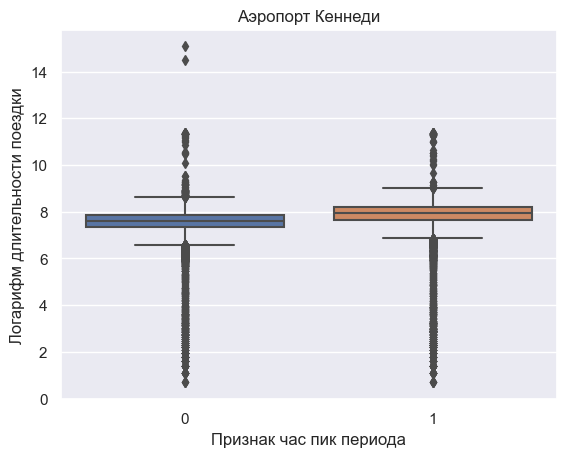

In [38]:
sns.boxplot(x = kennedy_df['traffic_jam_period'], y = kennedy_df['log_trip_duration'])
plt.title('Аэропорт Кеннеди')
plt.ylabel('Логарифм длительности поездки')
plt.xlabel('Признак час пик периода') 

Text(0.5, 0, 'Признак час пик периода')

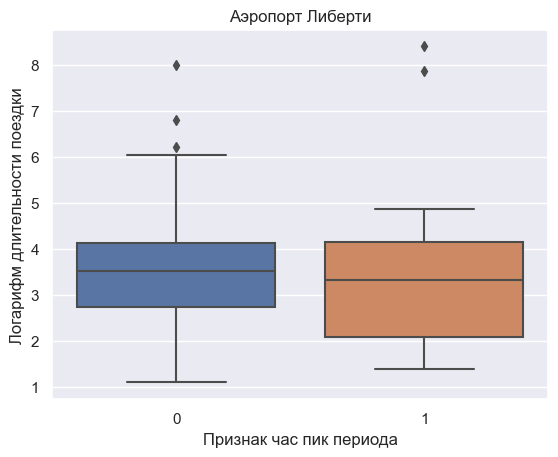

In [39]:
sns.boxplot(x = liberty_df['traffic_jam_period'], y = liberty_df['log_trip_duration'])
plt.title('Аэропорт Либерти')
plt.ylabel('Логарифм длительности поездки')
plt.xlabel('Признак час пик периода')

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Да, видно что во время час пика длительность поездки больше

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ...):
        # your code here
        pass
    
    def show_map(self):
        # you may want to visualize cells
        pass
    
    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        return X

SyntaxError: invalid syntax (3951019751.py, line 8)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period']], df_train['log_trip_duration'],
                                                   train_size = 0.7, test_size = 0.3, shuffle=True)
numeric_features = ['days', 'distance_haversine', 'log_haversine']
categorical = ['hours', 'weeks', 'month', 'anomaly', 'traffic_jam_period', 'no_traffic_jam_period']


column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                        ('scaling', StandardScaler(), numeric_features)])

pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', Ridge())])

model = pipeline.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test, Y_pred, squared=False))

Test MSE = 0.4983


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [42]:
print('Количество уникальных значений vendor_id:', len(set(df_train['vendor_id'])))
print('Количество уникальных значений passenger_count:', len(set(df_train['passenger_count'])))
print('Количество уникальных значений store_and_fwd_flag:', len(set(df_train['store_and_fwd_flag'])))

Количество уникальных значений vendor_id: 2
Количество уникальных значений passenger_count: 9
Количество уникальных значений store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

Text(0, 0.5, 'Логарифм длительности поездки')

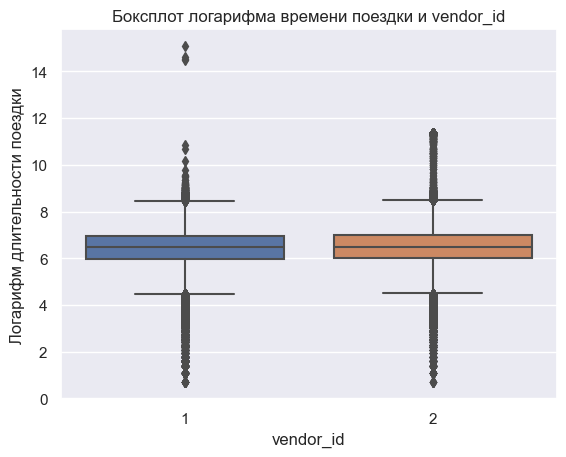

In [43]:
sns.boxplot(x = df_train['vendor_id'], y = df_train['log_trip_duration'])
plt.title('Боксплот логарифма времени поездки и vendor_id')
plt.xlabel('vendor_id')
plt.ylabel('Логарифм длительности поездки')

Text(0, 0.5, 'Логарифм длительности поездки')

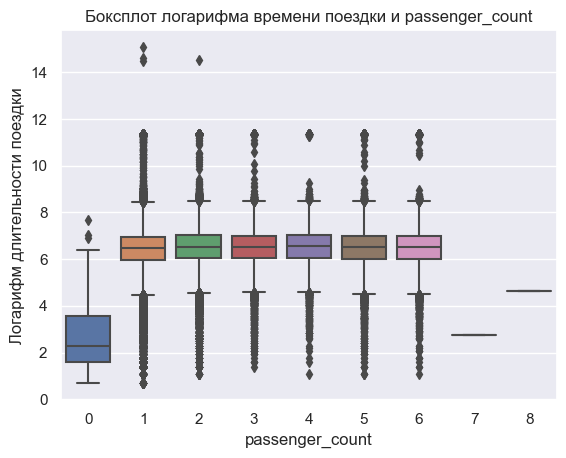

In [44]:
sns.boxplot(x = df_train['passenger_count'], y = df_train['log_trip_duration'])
plt.title('Боксплот логарифма времени поездки и passenger_count')
plt.xlabel('passenger_count')
plt.ylabel('Логарифм длительности поездки')

Text(0, 0.5, 'Логарифм длительности поездки')

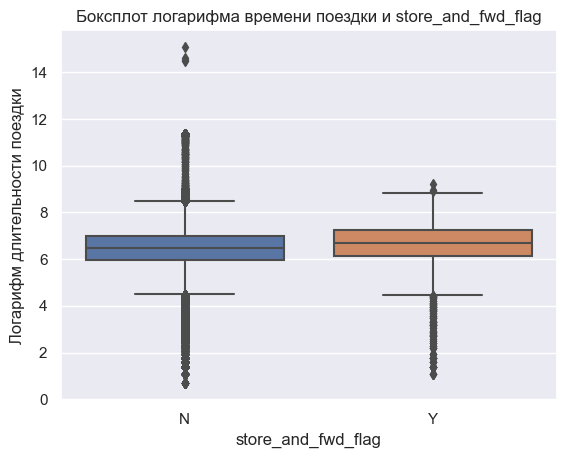

In [45]:
sns.boxplot(x = df_train['store_and_fwd_flag'], y = df_train['log_trip_duration'])
plt.title('Боксплот логарифма времени поездки и store_and_fwd_flag')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Логарифм длительности поездки')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [46]:
df_train['store_and_fwd_flag'] = df_train['store_and_fwd_flag'].replace('N', '0')
df_train['store_and_fwd_flag'] = df_train['store_and_fwd_flag'].replace('Y', '1')
df_train['vendor_id'] = df_train['vendor_id'].replace('2', '1')

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Только количество пассажиров, так как другие признаки имеют почти одинаковые значения(почти 100% корреляция)

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

C 3-мя признаками

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period', 
                                                             'store_and_fwd_flag', 'vendor_id', 'passenger_count']], df_train['log_trip_duration'],
                                                   train_size = 0.7, test_size = 0.3, shuffle=True)
numeric_features = ['days', 'distance_haversine', 'log_haversine']
categorical = ['hours', 'weeks', 'month', 'anomaly', 'traffic_jam_period', 'no_traffic_jam_period', 'store_and_fwd_flag', 'vendor_id', 'passenger_count']


column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                        ('scaling', StandardScaler(), numeric_features)])

pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', Ridge())])

model = pipeline.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test, Y_pred, squared=False))

Test MSE = 0.4847


С 1 признаком

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period', 'passenger_count']], df_train['log_trip_duration'],
                                                   train_size = 0.7, test_size = 0.3, shuffle=True)
numeric_features = ['days', 'distance_haversine', 'log_haversine']
categorical = ['hours', 'weeks', 'month', 'anomaly', 'traffic_jam_period', 'no_traffic_jam_period', 'passenger_count']


column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                        ('scaling', StandardScaler(), numeric_features)])

pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', Ridge())])

model = pipeline.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test, Y_pred, squared=False))

Test MSE = 0.4850


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Ахааа, не смотря на то что 2 признака имеют для себя почти одинаковые значения, они все равно дали меньше ошибку, чем с 1 признаком. Оставляем эти 3 признака

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

Text(0, 0.5, 'Количество')

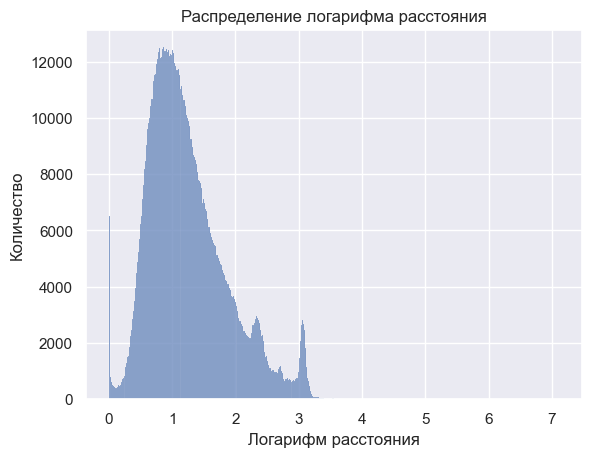

In [49]:
sns.histplot(df_train['log_haversine'])
plt.title('Распределение логарифма расстояния')
plt.xlabel('Логарифм расстояния')
plt.ylabel('Количество')

In [50]:
df_train['log_haversine'] = df_train['log_haversine'][df_train['log_haversine'] < np.quantile(df_train['log_haversine'], 0.95)]

Text(0, 0.5, 'Количество')

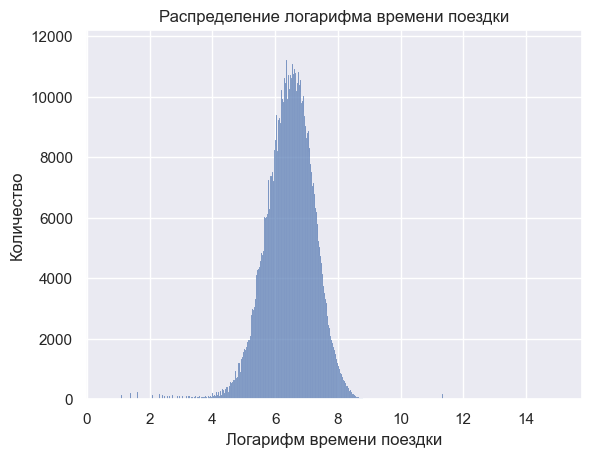

In [51]:
sns.histplot(df_train['log_trip_duration'])
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Логарифм времени поездки')
plt.ylabel('Количество')

In [52]:
df_train['log_trip_duration'] = df_train['log_trip_duration'][df_train['log_trip_duration'] > np.quantile(df_train['log_trip_duration'], 0.03)]


C:\Users\Spacelight\AppData\Local\Temp\ipykernel_8620\1023157607.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, bins=list_for_hist)


<Axes: xlabel='log_trip_duration', ylabel='Density'>

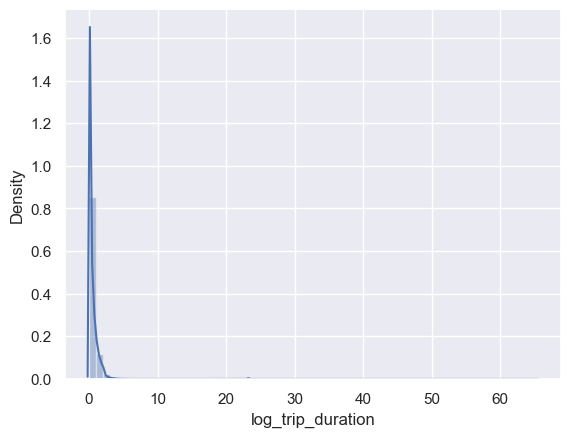

In [85]:
list_for_hist = range(0,21)
error = (Y_train - model.predict(X_train)) ** 2
sns.distplot(error, bins=list_for_hist)

Часть кода взята отсюда [Ссылка](https://github.com/esokolov/ml-course-hse/blob/master/2023-fall/seminars/sem02-sklearn-linregr.ipynb)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [53]:
df_train['hours'].value_counts()

19    63307
18    63199
21    58937
20    58798
22    56266
17    53581
14    52091
12    50514
15    50457
13    50015
23    48860
11    47984
9     47219
8     46981
10    45582
16    45121
7     38954
0     37373
1     27135
6     23138
2     19481
3     14569
4     11085
5     10403
Name: hours, dtype: int64

In [54]:
df_train['weeks'].value_counts()

5    156791
6    154832
4    152782
3    147013
2    141750
7    136538
1    131344
Name: weeks, dtype: int64

In [55]:
df_train['month'].value_counts()

3    179591
4    175787
5    173646
2    167088
6    163997
1    160941
Name: month, dtype: int64

In [56]:
df_train['anomaly'].value_counts()

0    1013114
1       7936
Name: anomaly, dtype: int64

In [57]:
df_train['traffic_jam_period'].value_counts()

0    537204
1    483846
Name: traffic_jam_period, dtype: int64

In [58]:
df_train['no_traffic_jam_period'].value_counts()

1    537204
0    483846
Name: no_traffic_jam_period, dtype: int64

In [59]:
df_train['passenger_count'].value_counts()

1    723660
2    147209
5     54672
3     41808
6     33814
4     19848
0        37
7         1
8         1
Name: passenger_count, dtype: int64

Видно, что признак passenger_count имеет редкие категории, уберем его.

In [60]:
df_train = df_train.drop('passenger_count', axis = 1)

In [61]:
df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period', 'log_trip_duration']].isna().sum()

days                         0
hours                        0
weeks                        0
month                        0
anomaly                      0
distance_haversine           0
log_haversine            51053
traffic_jam_period           0
no_traffic_jam_period        0
log_trip_duration        31077
dtype: int64

Видно, что после удаления выбросов, значения в log_trip_duration и в log_haversine равны NaN, что не даст обучить регрессию. 
Заменим эти значения на среднии показатели

In [62]:
avg_x = df_train['log_haversine'].dropna(how='any').mean()
df_train['log_haversine'] = df_train['log_haversine'].fillna(avg_x)

avg_y = df_train['log_trip_duration'].dropna(how='any').mean()
df_train['log_trip_duration'] = df_train['log_trip_duration'].fillna(avg_y)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period']], df_train['log_trip_duration'],
                                                   train_size = 0.7, test_size = 0.3, shuffle=True)
numeric_features = ['days', 'distance_haversine', 'log_haversine']
categorical = ['hours', 'weeks', 'month', 'anomaly', 'traffic_jam_period', 'no_traffic_jam_period']


column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                        ('scaling', StandardScaler(), numeric_features)])

pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', Ridge())])

model = pipeline.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test, Y_pred, squared=False))

Test MSE = 0.4855


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period']], df_train['log_trip_duration'],
                                                   train_size = 0.7, test_size = 0.3, shuffle=True)
numeric_features = ['days', 'distance_haversine', 'log_haversine']
categorical = ['hours', 'weeks', 'month', 'anomaly', 'traffic_jam_period', 'no_traffic_jam_period']


column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                        ('scaling', StandardScaler(), numeric_features)])

pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', Ridge())])

model = pipeline.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test, Y_pred, squared=False))
print("До OneHot:", X_train.shape)
print("После OneHot:", column_transformer.transform(X_train).shape)

Test MSE = 0.4845
До OneHot: (714735, 9)
После OneHot: (714735, 46)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [65]:
from sklearn.linear_model import Lasso
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period']], df_train['log_trip_duration'],
                                                   train_size = 0.7, test_size = 0.3, shuffle=True)
numeric_features = ['days', 'distance_haversine', 'log_haversine']
categorical = ['hours', 'weeks', 'month', 'anomaly', 'traffic_jam_period', 'no_traffic_jam_period']


column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                        ('scaling', StandardScaler(), numeric_features)])

pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', Lasso())])

model = pipeline.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test, Y_pred, squared=False))

Test MSE = 0.6927


Метод ридж-регрессии оказался лучше, так как с ним значение MSE ниже

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period']], df_train['log_trip_duration'],
                                                    train_size = 0.8, test_size = 0.2, random_state = 10)

numeric_features = ['days', 'distance_haversine', 'log_haversine']
categorical = ['hours', 'weeks', 'month', 'anomaly', 'traffic_jam_period', 'no_traffic_jam_period']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.fit_transform(X_test[numeric_features])

Best alpha = 1000.0000


Text(0, 0.5, 'CV score')

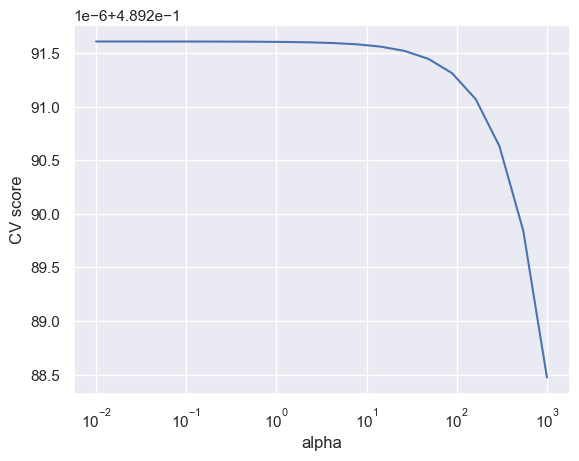

In [72]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, Y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Best lasso alpha = 0.0100


Text(0, 0.5, 'CV score')

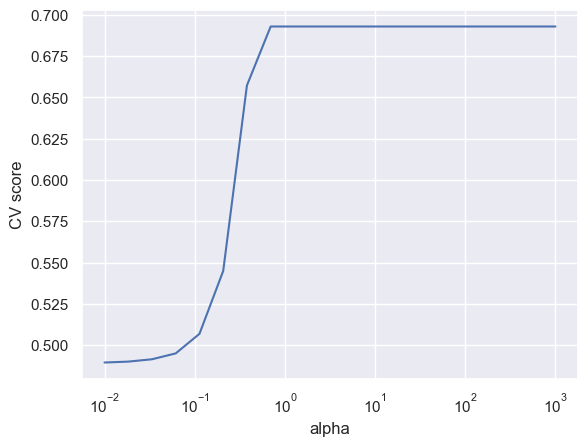

In [70]:
alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, Y_train)

best_lasso_alpha = searcher.best_params_["alpha"]
print("Best lasso alpha = %.4f" % best_lasso_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Часть кода взята отсюда [Ссылка](https://github.com/esokolov/ml-course-hse/blob/master/2023-fall/seminars/sem02-sklearn-linregr.ipynb)

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [82]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 46


In [78]:
step = 0
for alpha in alphas:
    numeric_features = ['days', 'distance_haversine', 'log_haversine']
    categorical = ['hours', 'weeks', 'month', 'anomaly', 'traffic_jam_period', 'no_traffic_jam_period']


    column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                        ('scaling', StandardScaler(), numeric_features)])

    pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', Lasso(alpha))])

    X_train, X_test, Y_train, Y_test = train_test_split(df_train[['days', 'hours', 'weeks', 'month', 'anomaly', 'distance_haversine', 
                                                             'log_haversine', 'traffic_jam_period', 'no_traffic_jam_period']], df_train['log_trip_duration'],
                                                   train_size = 0.8, test_size = 0.2, shuffle=True)

    model = pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Шаг:', step)
    print(f"alpha = {alpha} Test MSE = %.4f" % mean_squared_error(Y_test, Y_pred, squared=False))
    print(f"alpha = {alpha} Train MSE = %.4f" % mean_squared_error(Y_train, model.predict(X_train), squared=False))
    step += 1

alpha = 0.01 Test MSE = 0.4759
alpha = 0.01 Train MSE = 0.4876
Шаг: 0
alpha = 0.018329807108324356 Test MSE = 0.4976
alpha = 0.018329807108324356 Train MSE = 0.4800
Шаг: 1
alpha = 0.03359818286283781 Test MSE = 0.4891
alpha = 0.03359818286283781 Train MSE = 0.4915
Шаг: 2
alpha = 0.06158482110660264 Test MSE = 0.5025
alpha = 0.06158482110660264 Train MSE = 0.5013
Шаг: 3
alpha = 0.11288378916846889 Test MSE = 0.5212
alpha = 0.11288378916846889 Train MSE = 0.5061
Шаг: 4
alpha = 0.20691380811147891 Test MSE = 0.5517
alpha = 0.20691380811147891 Train MSE = 0.5439
Шаг: 5
alpha = 0.37926901907322497 Test MSE = 0.6683
alpha = 0.37926901907322497 Train MSE = 0.6675
Шаг: 6
alpha = 0.6951927961775606 Test MSE = 0.6934
alpha = 0.6951927961775606 Train MSE = 0.6926
Шаг: 7
alpha = 1.2742749857031335 Test MSE = 0.6922
alpha = 1.2742749857031335 Train MSE = 0.6931
Шаг: 8
alpha = 2.3357214690901213 Test MSE = 0.6908
alpha = 2.3357214690901213 Train MSE = 0.6937
Шаг: 9
alpha = 4.281332398719392 Test MSE

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.